In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
print(engine)

Engine(sqlite:///Resources/hawaii.sqlite)


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Calculate the date 1 year ago from today
precipsept2017= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date =="2017-09-12").all()
precipsept2017

[]

In [11]:
# Perform a query to retrieve the data and precipitation scores
PrcpQuery=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2017-01-01', '2017-31-12')).all()
PrcpQuery

[('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 ('2017-02-14', 0.0),
 (

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Prcp_df=pd.DataFrame(PrcpQuery)
Prcp_df.set_index('date').head()


,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


<IPython.core.display.Javascript object>


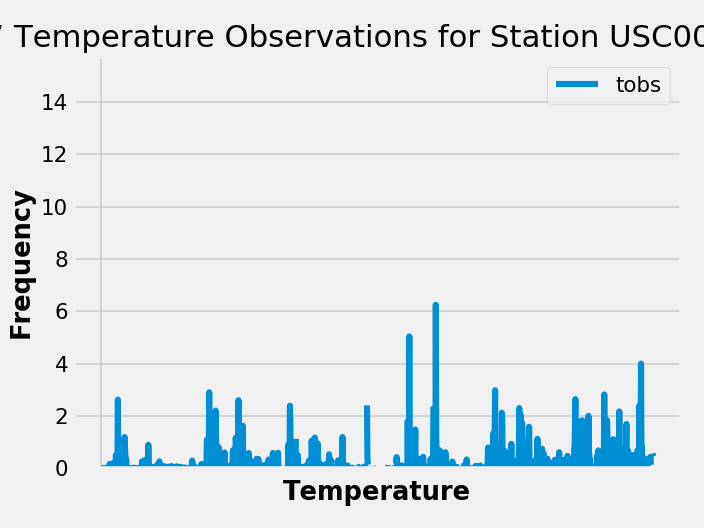

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#results = session.query(Measurement.date, Measurement.precip).filter(Measurement.date >= '2017-01-01')
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

Prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis - 2017")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Rotate the xticks for the dates


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp_df.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [15]:
# How many stations are available in this dataset?
NumberStations = session.query(Measurement.station).distinct(Measurement.station).count()

print("Total number of stations is "+ str(NumberStations))

Total number of stations is 9


In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
MostActiveStations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
MostActiveStations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
MostStaStats=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                           filter(Measurement.station=='USC00519281').all()
MostStaStats                                                           

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Choose the station with the highest number of temperature observations.
MostStaResults = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2017-01-01', '2017-12-31')).\
                                   filter(Measurement.station=='USC00519281').limit(15).all()
MostStaResults

[('USC00519281', 72.0),
 ('USC00519281', 70.0),
 ('USC00519281', 64.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 62.0),
 ('USC00519281', 70.0),
 ('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 63.0),
 ('USC00519281', 65.0),
 ('USC00519281', 69.0),
 ('USC00519281', 77.0),
 ('USC00519281', 70.0)]

In [19]:
temperatures = [temp[0] for temp in MostStaResults]

In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temperatures, bins=12, color='g')
plt.title('2017 Temperature Observations for Station USC00519281')
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)
plt.show()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
